### KRUŽNICA
Kružnica je skup svih točaka u ravnini jednako udaljenih od zadane točke (središta). Krug je geometrijski lik omeđen kružnicom.

Kružnica sa središtem u točki $S(p,q)$ i polumjerom $r>0$ određena je jednadžbom:
$$(x-p)^2+(y-q)^2=r^2$$

Parametarska jednadžba kružnice je $(\rho\in [0,2\pi], 0\leq r < +\infty)$:
$$x=r\cos(\rho)$$ $$y=r\sin(\rho)$$

Sljedeća slika prikazuje jediničnu kružnicu (r=1) sa središtem u ishodištu koordinatnog sustava (p=q=0):

Text(0.5,0.05,'r=1')

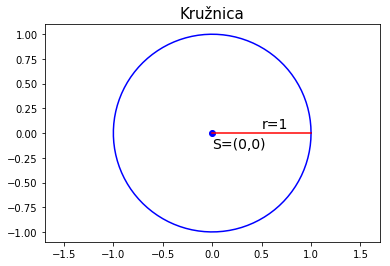

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0, 2 * np.pi, 100)
x1 = np.linspace(0, 1.0, 100)
y1 = np.linspace(0, 0, 100)
x2 = np.cos(t)
y2 = np.sin(t)

fig, ax = plt.subplots()
ax.plot(x2, y2, 'b')
ax.set_title('Kružnica', fontsize=15)
ax.axis('equal')
ax.scatter(0.0, 0.0, c='b')
ax.plot(x1, y1, 'r')
ax.text(0.0, -0.15, "S=(0,0)", fontsize=14)
ax.text(0.5, 0.05, "r=1", fontsize=14)


##### Presjek kružnica

Kružnice $K(S,R)$ i $k(s,r)$:
1. Nemaju zajedničkih točaka ako i samo ako je: $\bar{Ss}> R + r$ ili $\bar{Ss}< R - r$
2. Imaju jednu i samo jednu zajedničku točku koja leži na zajedničkoj tangnti $\rightarrow \bar{Ss} = R + r$  
3. Imaju dvije i samo dvije zajedničke točke koje leže na zajedničkoj tangenti $\rightarrow R - r < \bar{Ss} < R+r$

Udaljenost središta je 1.4142135623730951
Sijeku se u točno dvije točke!


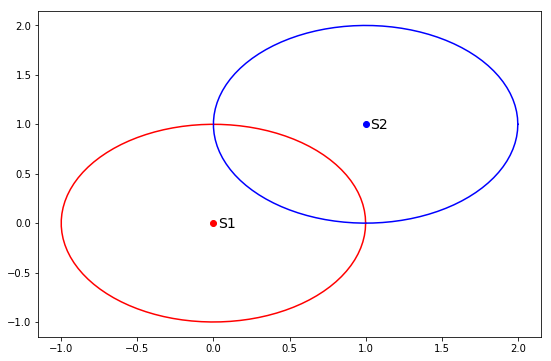

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))


def presjek(x1, x2, y1, y2, r1, r2):
    rho = np.linspace(0, 2*np.pi, 100)
    X1 = r1*np.cos(rho)+x1
    Y1 = r1*np.sin(rho)+y1
    X2 = r2*np.cos(rho)+x2
    Y2 = r2*np.sin(rho)+y2
    d = np.sqrt((x1-x2)**2+(y1-y2)**2)
    print("Udaljenost središta je {}".format(d))
    maxi = max(r1, r2)
    mini = min(r1, r2)
    if(d > maxi + mini):
        print("Kružnice se ne sijeku!")
    elif(d < maxi - mini):
        print("Kružnica manjeg promjera je unutar kružnice večeg promjera!")
    elif(maxi - mini < d and d < maxi + mini):
        print("Sijeku se u točno dvije točke!")
    elif(d == maxi + mini):
        print("Sijeku se točno u jednoj točki!")

    ax.plot(X1, Y1, 'r')
    ax.plot(X2, Y2, 'b')
    ax.scatter(x1, y1, c='r')
    ax.scatter(x2, y2, c='b')
    ax.text(x1+0.03, y1-0.05, "S1", fontsize=14)
    ax.text(x2+0.03, y2-0.05, "S2", fontsize=14)
presjek(0, 1, 0, 1, 1, 1)


##### Sfera
Kružnice su ravninski presjeci sfere. __Sfera__ je savršeno okrugli geometrijski i kružni objekat u trodimenzionalnom prostoru. Slično definiciji kružnice, koja je dvodimenzionalna, sfera je matematički definirana kao skup svih točaka koji se nalaze na istoj udaljenosti $r>o$ od određene točke $S$ u trodimenzionalnom prostoru. $S$ je središte sfere, a $r$ polumjer ili radijus.

Prikaz sfere u prostornim polarnim koordinatama $(0\leq\rho\leq 2\pi, 0\leq \theta \leq \pi, 0\leq r <+\infty):$
$$ s(\theta,\rho)=(r\sin\theta\cos\rho, r\sin\rho\sin\theta, r\cos\theta) $$

Sljedeća slika prikazuje jediničnu sferu (r=1) sa središtem u ishodištu koordinatnog sustava:

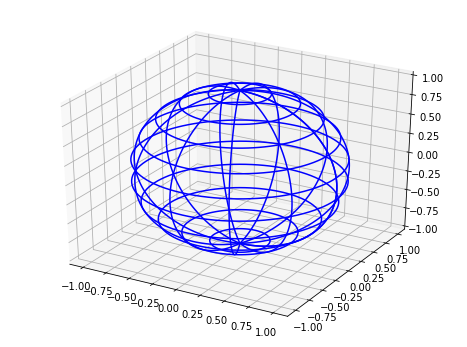

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2*np.pi, 100)
rho = np.linspace(0, np.pi, 100)


def s(theta, rho):
    x = np.outer(np.cos(theta), np.sin(rho))
    y = np.outer(np.sin(theta), np.sin(rho))
    z = np.outer(np.ones(np.size(theta)), np.cos(rho))
    return x, y, z

x, y, z = s(theta, rho)
ax.plot_wireframe(x, y, z, rstride=9, cstride=9, color='blue')


__Tangencijalna ravnina__ sfere u njezinoj točki $T$ je ravnina koja prolazi tom točkom i okomita je na spojnicu $ST$, tj. pravac $ST$ je normala sfere u točki $T$.

Sljedeća funkcija daje normalu sfere radijusa 2 :

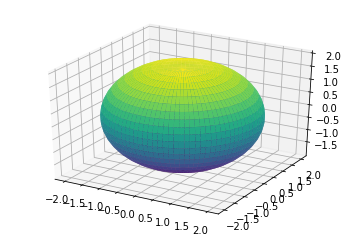

Normala je [4*sin(u)**2*cos(v), 4*sin(u)**2*sin(v), 2*sin(2*u)]


In [12]:
from sympy.plotting import plot3d_parametric_surface
from sympy import *

u = Symbol('u')
v = Symbol('v')


def normala(s):
    s0 = s[0]
    s1 = s[1]
    s2 = s[2]

    du0 = diff(s0, u, 1)
    du1 = diff(s1, u, 1)
    du2 = diff(s2, u, 1)

    dv0 = diff(s0, v, 1)
    dv1 = diff(s1, v, 1)
    dv2 = diff(s2, v, 1)

    n1 = -du2*dv1
    n1 = simplify(n1)
    n2 = du2*dv0
    n2 = simplify(n2)
    n3 = du0*dv1 - du1*dv0
    n3 = simplify(n3)

    n = [n1, n2, n3]
    return n
x = 2*sin(u)*cos(v)
y = 2*sin(u)*sin(v)
z = 2*cos(u)
plot3d_parametric_surface(x, y, z, (u, 0, 2*pi), (v, 0, pi))
print("Normala je {}".format(normala([x, y, z])))


__Loksodroma__ je spirala na sferi. Na zemaljskoj kugli to je krivulja koja siječe sve meridijane pod jednakim kutom, od jednog pola do drugog.

In [14]:
from IPython.display import Image
Image(url="https://upload.wikimedia.org/"
      "wikipedia/commons/6/6e/KUGSPI-9_Loxodrome.gif")


##### CIKLOIDA
Cikloida nastaje gibanjem kružnice po pravcu.

In [20]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/'
      'wikipedia/commons/6/69/Cycloid_f.gif')
